Computer vision is the art of teaching a computer to see.

For example, it could involve building a model to classify whether a photo is of a cat or a dog (binary classification).

Or whether a photo is of a cat, dog or chicken (multi-class classification).

Or identifying where a car appears in a video frame (object detection).

Or figuring out where different objects in an image can be separated (semantic segmentation, instance segmentation, panoptic segmentation).
https://machinelearning.apple.com/research?page=1&domain=Computer+Vision
https://www.tesla.com/en_eu/AI

Specifically, we're going to cover:

**Topic	- Contents**

```0. Computer vision libraries in PyTorch```: PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out.

```1. Load data```:	To practice computer vision, we'll start with some images of different pieces of clothing from ```FashionMNIST```.

```2. Prepare data```:	We've got some images, let's load them in with a PyTorch ```DataLoader``` so we can use them with our training loop.

```3. Model 0: Building a baseline model```: Here we'll create a ```multi-class classification model``` to learn patterns in the data, we'll also choose a ```loss function, optimizer and build a training loop```.

```4. Making predictions and evaluting model 0```:	Let's make some predictions with our baseline model and evaluate them.

```5. Setup device agnostic code for future models```:	It's best practice to write device-agnostic code, so let's set it up.

```6. Model 1: Adding non-linearity```: Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers.

```7. Model 2: Convolutional Neural Network (CNN)```:	Time to get computer vision specific and introduce the powerful convolutional neural network architecture.

```8. Comparing our models:```	We've built three different models, let's compare them.

```9. Evaluating our best model```:	Let's make some predictons on random images and evaluate our best model.

```10. Making a confusion matrix```:	A confusion matrix is a great way to evaluate a classification model, let's see how we can make one.

```11. Saving and loading the best performing model```:	Since we might want to use our model for later, let's save it and make sure it loads back in correctly.

### **0. Computer vision libraries in PyTorch**
Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

**PyTorch module -	What does it do?**
- ```torchvision```:	Contains ```datasets, model architectures and image transformations``` often used for computer vision problems.
- ```torchvision.datasets```:	Here you'll find many example computer vision datasets for a range of problems from ```image classification, object detection, image captioning, video classification and more```. It also contains a series of base classes for making ```custom datasets``` https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets.
- ```torchvision.models```:	This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.
- ```torchvision.transforms```:	Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.
- ```torch.utils.data.Dataset```:	Base dataset class for PyTorch.
- ```torch.utils.data.DataLoader```:	Creates a Python iterable over a dataset (created with ```torch.utils.data.Dataset```).

**Note**: The ```torch.utils.data.Dataset and torch.utils.data.DataLoader``` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Now we've covered some of the most important PyTorch computer vision libraries, let's import the relevant dependencies.

**Npte: torch uses images of shape (Channels, Height, Width) or (B, C, H, W) Channels first by default, we can transofrm as we need like (H, W, C) or equivalently (B, H, W, C)

In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor

import numpy as np
import matplotlib.pyplot as plt

device = ("cuda" if torch.cuda.is_available() else "cpu")
device, torch.__version__, torchvision.__version__

('cuda', '2.1.0+cu121', '0.16.0+cu121')

###**1. Getting a dataset**
To begin working on a computer vision problem, let's get a computer vision dataset.

We're going to start with ```FashionMNIST```.

```MNIST``` stands for Modified National Institute of Standards and Technology.

The ```original MNIST``` dataset contains **thousands of examples of handwritten digits (from 0 to 9)** and was used to build computer vision models ```to identify numbers for postal services```.

```FashionMNIST```, made by **Zalando Research**, is a similar setup.

Except it contains **grayscale images of 10 different kinds of clothing**.

```torchvision.datasets``` contains a lot of example datasets you can use to practice writing computer vision code on. ```FashionMNIST``` is one of those datasets. And since it has ```10 different image classes``` (different types of clothing), it's a ```multi-class classification problem```.

Later, we'll be building a computer vision neural network to identify the different styles of clothing in these images.

PyTorch has a bunch of common computer vision datasets stored in torchvision.datasets.

Including FashionMNIST in ```torchvision.datasets.FashionMNIST()```.

To download it, we provide the following parameters:

- ```root```: str - which folder do you want to download the data to?
- ```train```: Bool - do you want the training or test split?
- ```download```: Bool - should the data be downloaded?
- ```transform```: torchvision.transforms - what transformations would you like to do on the data?
- ```target_transform``` - you can transform the targets (labels) if you like too.

Many other datasets in torchvision have these parameter options.

In [2]:
# Setup training data
train_data = torchvision.datasets.FashionMNIST(
    root="data", # where to download data to? we give directory path here, it ll be downloaded under data folder in current directory
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    transform=transforms.ToTensor(),
    download=True,
    target_transform=None
)


100%|██████████| 26421880/26421880 [00:02<00:00, 11912276.46it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 205105.79it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3753783.63it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21592276.99it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Let's check out the first sample of the training data.

In [3]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
type(train_data[0]) #returns tuple with image and label

tuple

In [7]:
#image shape, its label
train_data[0][0].shape, image.shape, train_data[0][1], label

#image is of (c, h, w)

(torch.Size([1, 28, 28]), torch.Size([1, 28, 28]), 9, 9)


The shape of the image tensor is [1, 28, 28] or more specifically:

[color_channels=1, height=28, width=28]

Having color_channels=1 means the image is ```grayscale```.

Various problems will have various input and output shapes. But the premise remains: encode data into numbers, build a model to find patterns in those numbers, convert those patterns into something meaningful.

If ```color_channels=3```, the image comes in pixel values for red, green and blue (this is also known a the ```RGB``` color model).

The order of our current tensor is often referred to as ```CHW``` (Color Channels, Height, Width).

There's debate on whether images should be represented as ```CHW```(color channels first) or ```HWC```(color channels last).

**Note**: You'll also see ```NCHW```and ```NHWC``` formats where N stands for number of images. For example if you have a ```batch_size=32```, your tensor shape may be ```[32, 1, 28, 28]```. We'll cover batch sizes later.

PyTorch generally accepts NCHW (channels first) as the default for many operators.

However, PyTorch also explains that NHWC (channels last) performs better and is considered best practice.

For now, since our dataset and models are relatively small, this won't make too much of a difference.

But keep it in mind for when you're working on larger image datasets and using convolutional neural networks (we'll see these later).

Let's check out more shapes of our data.

In [8]:
#see the class names
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
#class_to_idx to get idxes for each class
class_to_idx = train_data.class_to_idx
class_to_idx #return dictionary with class labels as key and indexes as values

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
#access the labels of training data
train_data.targets, len(train_data.targets)

(tensor([9, 0, 0,  ..., 3, 0, 5]), 60000)

In [11]:
#access the data i.e images of training data
train_data.data, len(train_data.data) #tensors of all trianing images

(tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         ...,
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0

In [12]:
# How many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

Because we're working with 10 different classes, it means our problem is multi-class classification.

Let's get visual.

### **1.2 Visualizing our data**

Image shape: torch.Size([1, 28, 28])


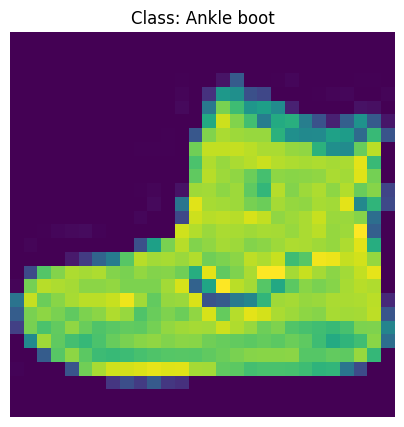

In [13]:
plt.figure(figsize=(5, 5))
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) #remove the 1 dimension and make it 2D instead of 3D
plt.title(f"Class: {class_names[label]}")
plt.axis("off")
plt.show()

We can turn the image into grayscale using the cmap parameter of plt.imshow().

Image shape: torch.Size([1, 28, 28])


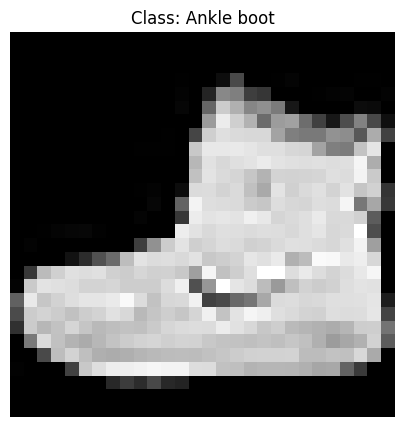

In [14]:
plt.figure(figsize=(5, 5))
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray") #remove the 1 dimension and make it 2D instead of 3D bcz imshow takes 2D
plt.title(f"Class: {class_names[label]}")
plt.axis("off")
plt.show()

Beautiful, well as beautiful as a pixelated grayscale ankle boot can get.

Let's view a few more.

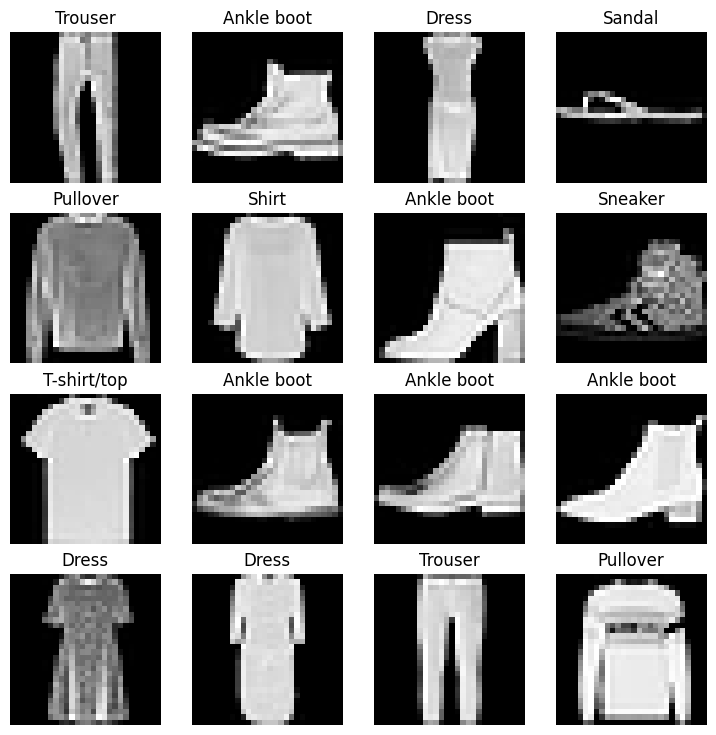

In [15]:
fig = plt.figure(figsize=(9, 9))
#random 16 images
rows, cols = 4, 4
for i in range(0, rows*cols):
    fig.add_subplot(rows, cols, i+1)
    idx = torch.randint(low=0, high=len(train_data), size=[1]).item() #get the random idx
    image, label = train_data[idx]
    plt.imshow(image.squeeze(), cmap="gray") #remove the 1 dimension and make it 2D instead of 3D bcz imshow takes 2D
    plt.title(f"{class_names[label]}")
    plt.axis("off")
plt.show()

Hmmm, this dataset doesn't look too aesthetic.

But the principles we're going to learn on how to build a model for it will be similar across a wide range of computer vision problems.

In essence, taking pixel values and building a model to find patterns in them to use on future pixel values.

Plus, even for this small dataset (yes, even 60,000 images in deep learning is considered quite small), could you write a program to classify each one of them?

You probably could.

But I think coding a model in PyTorch would be faster.

**Question: Do you think the above data can be model with only straight (linear) lines? Or do you think you'd also need non-straight (non-linear) lines?**



### **2. Prepare DataLoader**
Now we've got a dataset ready to go.

The next step is to prepare it with a ```torch.utils.data.DataLoader or DataLoader``` for short.

The DataLoader does what you think it might do.

It helps load data into a model.

For training and for inference.

It turns a large Dataset into a Python iterable of smaller chunks.

These smaller chunks are called batches or mini-batches and can be set by the ```batch_size``` parameter.

**Why do this?**

Because it's more computationally efficient.

In an ideal world you could do the forward pass and backward pass across all of your data at once.

But once you start using really large datasets, unless you've got infinite computing power, it's easier to break them up into batches.

It also gives your model more opportunities to improve.

With ```mini-batches``` (small portions of the data), ```gradient descent``` is performed more often ```per epoch (once per mini-batch rather than once per epoch)```.

**What's a good batch size?**

```32``` is a good place to start for a fair amount of problems.

But since this is a value you can set (a hyperparameter) you can try all different kinds of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512).

Batching FashionMNIST with a batch size of 32 and ```shuffle``` turned on. A similar batching process will occur for other datasets but will differ depending on the batch size.

Let's create DataLoader's for our training and test sets.

In [16]:
#currently our dataset of ot dataset type
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [17]:
#Lets use DataLoader to create iterable/generator that gives minibatches
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(
    dataset=train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False  # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches each of {BATCH_SIZE} samples")
print(f"Length of test dataloader: {len(test_dataloader)} batches each of {BATCH_SIZE} samples")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x793fce35d420>, <torch.utils.data.dataloader.DataLoader object at 0x793fce35f880>)
Length of train dataloader: 1875 batches each of 32 samples
Length of test dataloader: 313 batches each of 32 samples


In [18]:
# Check out what's inside the training dataloader
train_images_batch, train_labels_batch = next(iter(train_dataloader))
train_images_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

And we can see that the data remains unchanged by checking a single sample.

Image size: torch.Size([1, 28, 28])
Label: 7, label size: torch.Size([])


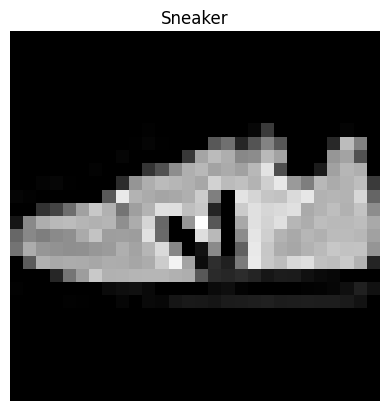

In [19]:
#lets visualize one example from the above batch
torch.manual_seed(42) #for rand index
randidx = torch.randint(0, len(train_images_batch), size=[1]).item()
image = train_images_batch[randidx] #1, 28, 28
label = train_labels_batch[randidx]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"{class_names[label]}")
plt.axis("off");
print(f"Image size: {image.shape}")
print(f"Label: {label}, label size: {label.shape}")
plt.show()

###**3. Model 0: Build a baseline model**
Data loaded and prepared!

Time to build a **baseline model** by subclassing nn.Module.

A **baseline model** is one of the simplest models you can imagine.

You use the baseline as a starting point and try to improve upon it with subsequent, more complicated models.

Our baseline will consist of **two nn.Linear()** layers.

We've done this in a previous section but there's going to one slight difference.

Because we're working with image data, we're going to use a different layer to start things off.

And that's the ``nn.Flatten()`` layer.

``nn.Flatten()`` compresses the dimensions of a tensor into a single vector.

This is easier to understand when you see it.

In [20]:
# Create a flatten layer
flattenmodel = nn.Flatten() ## all nn modules function as a model (and can do a forward pass)

#lets take one example/image from our batch
x = train_images_batch[0]

print(x.shape)
# Flatten the sample
flattened_x = flattenmodel(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {flattened_x.shape} -> [color_channels, height*width]") #(1, 784) #(m, n) shape m examples, n features => rows as examples, cols as features

# Try uncommenting below and see what happens
# print(x) #3d matrix
# print(flattened_x) #2d matrix

torch.Size([1, 28, 28])
Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


The nn.Flatten() layer took our shape from [color_channels, height, width] to [color_channels, height*width].

**Why do this?**

Because we've now turned our pixel data from height and width dimensions into one long feature vector.

And ```nn.Linear()``` layers like their inputs to be in the form of feature vectors.

Let's create our first model using ```nn.Flatten()``` as the first layer.

In [21]:
from torch import nn
class FashionMnistV0(nn.Module):
    def __init__(self, input_features: int, output_features: int, hidden_units: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form - (b, c, hw)
            nn.Linear(in_features=input_features, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x): #x is gonna be (batchsize, channel, h, w)
        return self.layer_stack(x)


Wonderful!

We've got a baseline model class we can use, now let's instantiate a model.

We'll need to set the following parameters:

- ```input_shape=784``` - this is how many features you've got going in the model, in our case, it's one for every pixel in the target image (28 pixels high by 28 pixels wide = 784 features).
- ```hidden_units=10``` - number of units/neurons in the hidden layer(s), this number could be whatever you want but to keep the model small we'll start with 10.
- ```output_shape=len(class_names)``` - since we're working with a multi-class classification problem, we need an output neuron per class in our dataset.

Let's create an instance of our model and send to the CPU for now (we'll run a small test for running model_0 on CPU vs. a similar model on GPU soon).

In [22]:
torch.manual_seed(42)

modelv0 = FashionMnistV0(
    input_features=784, # one for every pixel (28x28)
    output_features=len(class_names), # one for every class
    hidden_units=10 # how many units in the hiden layer
)
modelv0.to("cpu")

FashionMnistV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [23]:
modelv0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [24]:
modelv0.state_dict().get("layer_stack.1.weight").shape #weights of first hidden layer shape (nl, nl-1)

torch.Size([10, 784])

In [25]:
modelv0.state_dict().get("layer_stack.1.bias").shape

torch.Size([10])

In [26]:
#second layer
modelv0.state_dict().get("layer_stack.2.weight").shape, modelv0.state_dict().get("layer_stack.2.bias").shape

(torch.Size([10, 10]), torch.Size([10]))

In [27]:
#just see how our initial model performs with dummy random image with batch size 1
torch.manual_seed(42)

dummy_x = torch.rand([1, 1, 28, 28])

modelv0.eval()
with torch.inference_mode():
    pred = modelv0(dummy_x) #see it return logits for 10 classes

pred

tensor([[ 0.1813, -0.3193,  1.3691,  0.9185, -0.1709, -1.0997, -0.3299,  1.6366,
         -0.0506, -0.6301]])

###**3.1 Setup loss, optimizer and evaluation metrics**
Since we're working on a classification problem, let's bring in our helper_functions.py script and subsequently the accuracy_fn() we defined in notebook 02.

Note: Rather than importing and using our own accuracy function or evaluation metric(s), you could import various evaluation metrics from the TorchMetrics package.

In [28]:
import requests
from pathlib import Path

# print(Path)
# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    # Note: you need the "raw" GitHub URL for this to work
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

In [29]:
# Import accuracy metric
from helper_functions import accuracy_fn
## Note: we could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()  # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=modelv0.parameters(), lr=0.1)

In [30]:
# def accuracy_fn(y_preds, y_true):
#     preds = torch.eq(y_preds, y_true).sum().item()
#     acc = (preds / len(y_true)) * 100
#     return acc

###**3.2 Creating a function to time our experiments**
Loss function and optimizer ready!

It's time to start training a model.

But how about we do a little experiment while we train.

I mean, let's make a timing function to measure the time it takes our model to train on CPU versus using a GPU.

We'll train this model on the CPU but the next one on the GPU and see what happens.

Our timing function will import the ```timeit.default_timer()``` function from the ```Python timeit module```.

In [31]:
from timeit import default_timer as timer

#default_timer is nothing time.perf_counter()  returns float seconds. An alternative, time.perf_counter_ns, returns integer nanoseconds.
def print_train_time(start: float, end: float, device: torch.device=None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time


In [32]:
#test our function
start_time = timer()
#somecode
end_time = timer()
print_train_time(start_time, end_time, device=torch.device("cpu"))

Train time on cpu: 0.000 seconds


3.3766999990803015e-05

###**3.3 Creating a training loop and training a model on batches of data**

Beautiful!

Looks like we've got all of the pieces of the puzzle ready to go, ```a timer, a loss function, an optimizer, a model and most importantly, some data```.

Let's now create a ```training loop``` and a ```testing loop``` to train and evaluate our model.

**We'll be using the same steps as the previous notebook(s), though since our data is now in batch form, we'll add another loop to loop through our data batches.**

Our data batches are contained within our ```DataLoader```s, ```train_dataloader``` and ```test_dataloader``` for the training and test data splits respectively.

A batch is ```BATCH_SIZE``` samples of ```X ```(features) and ```y``` (labels), since we're using ```BATCH_SIZE=32```, our batches have 32 samples of images and targets.

And since we're computing on batches of data, our loss and evaluation metrics will be calculated per batch rather than across the whole dataset.

**This means we'll have to divide our loss and accuracy values by the number of batches in each dataset's respective dataloader.**

Let's step through it:

- Loop through epochs.
- Loop through training batches, perform training steps, calculate the train loss per batch.
- Loop through testing batches, perform testing steps, calculate the test loss per batch.
- Print out what's happening.
- Time it all (for fun).

A fair few steps but...

...if in doubt, code it out.

In [33]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
import numpy as np

# Set the seed and start the timer
torch.manual_seed(42)
train_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
#Training loop using minibatches from dataloader iter
for i in tqdm(range(epochs)): #wrap tqdm with our epoch iterator to show nice progress bar tracking epochs, rather than just google colab's inbuilt jupyter progress bar
    print(f"Epoch: {i}\n-------")

    ### Training
    #set the trainloss, testloss, trainacc, testacc to accumulate for all the batches
    train_loss, train_acc = 0., 0.
    test_loss, test_acc = 0., 0.

    #batches - Add a loop to loop through training batches
    for batch, (X, Y) in enumerate(train_dataloader):
        modelv0.train()
        Y_pred_logits = modelv0(X)
        Y_pred_probs = torch.softmax(Y_pred_logits, dim=1)
        Y_preds = torch.argmax(Y_pred_probs, dim=1).squeeze()
        loss = loss_fn(Y_pred_logits, Y)
        train_loss += loss #accumulating loss per batch
        acc = accuracy_fn(y_true=Y, y_pred=Y_preds)
        train_acc += acc
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #printing the progress of how many examples have looked so far
        if np.ceil(batch % 400) == 0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    #average the loss and accuracy of all the batches accumulated => average metric per epoch
    train_acc /= len(train_dataloader) #len(train_dataloader) = 1875 batches
    train_loss /= len(train_dataloader)

    #Evaluation
    #no need of tracking batches using enumerate, we just pass the data iteratively
    modelv0.eval()
    with torch.inference_mode():
        for X_test, Y_test in test_dataloader:
            # 1. Forward pass
            Y_test_logits = modelv0(X_test)
            Y_test_preds = torch.argmax(Y_test_logits, dim=1).squeeze()

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(Y_test_logits, Y_test) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=Y_test, y_pred=Y_test_preds)

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader) #len(test_dataloader) = 313 batches
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Train acc: {train_acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(
    train_start_on_cpu, train_end_on_cpu,
    device=str(next(modelv0.parameters()).device)
)




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.59039 | Train acc: 79.17% | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.47633 | Train acc: 83.32% | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.45503 | Train acc: 84.05% | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 27.357 seconds


Nice! Looks like our baseline model did fairly well.

It didn't take too long to train either, even just on the CPU, I wonder if it'll speed up on the GPU?

Let's write some code to evaluate our model.

###**4. Make predictions and get ModelV0 results**
Since we're going to be building a few models, it's a good idea to write some code to evaluate them all in similar ways.

Namely, let's create a function that takes in a trained model, a DataLoader, a loss function and an accuracy function.

The function will use the model to make predictions on the data in the DataLoader and then we can evaluate those predictions using the loss function and accuracy function.

In [34]:
torch.manual_seed(42)

#functionize the inference
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0., 0.
    model.eval()
    with torch.inference_mode():
        for X, Y in tqdm(data_loader): #progressbar on testdataloader
            # Make predictions with the model
            Y_pred_logits = model(X)
            Y_preds = Y_pred_logits.argmax(dim=1)
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(Y_pred_logits, Y)
            acc += accuracy_fn(Y, Y_preds.squeeze())
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__, # only works when model was created with a class
        "model_loss": loss.item(), #access the value in the tensor vector
        "model_acc": acc
    }


In [35]:
#test the above function
modelv0_results = eval_model(modelv0, test_dataloader, loss_fn, accuracy_fn)
modelv0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMnistV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

Looking good!

We can use this dictionary to compare the baseline model results to other models later on.

###**5. Setup device agnostic-code (for using a GPU if there is one)**
We've seen how long it takes to train ma PyTorch model on 60,000 samples on CPU.

**Note**: Model training time is dependent on hardware used. Generally, more processors means faster training and smaller models on smaller datasets will often train faster than large models and large datasets.

Now let's setup some device-agnostic code for our models and data to run on GPU if it's available.

If you're running this notebook on Google Colab, and you don't a GPU turned on yet, it's now time to turn one on via Runtime -> Change runtime type -> Hardware accelerator -> GPU. If you do this, your runtime will likely reset and you'll have to run all of the cells above by going Runtime -> Run before.

In [36]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'


Beautiful!

Let's build another model.

###**6. Model 1: Building a better model with non-linearity**
We learned about the power of non-linearity in notebook 02.

Seeing the data we've been working with, do you think it needs non-linear functions?

And remember, linear means straight and non-linear means non-straight.

Let's find out.

We'll do so by recreating a similar model to before, except this time we'll put non-linear functions (```nn.ReLU()```) in between each linear layer.

In [37]:
from torch import nn
# Create a model with non-linear and linear layers
class FashionMnistV1(nn.Module):
    def __init__(self, input_features: int, output_features: int, hidden_units: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_features, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)


That looks good.

Now let's instantiate it with the same settings we used before.

We'll need input_shape=784 (equal to the number of features of our image data), hidden_units=10 (starting small and the same as our baseline model) and output_shape=len(class_names) (one output unit per class).

**Note**: Notice how we kept most of the settings of our model the same except for one change: adding non-linear layers. This is a standard practice for running a series of machine learning experiments, change one thing and see what happens, then do it again, again, again. - orthogonality

In [38]:
torch.manual_seed(42)
modelv1 = FashionMnistV1(input_features=784, output_features=len(class_names), hidden_units=10)
modelv1.to(device)

FashionMnistV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [39]:
next(modelv1.parameters()).device

device(type='cuda', index=0)

###**6.1 Setup loss, optimizer and evaluation metrics**
As usual, we'll setup a loss function, an optimizer and an evaluation metric (we could do multiple evaluation metrics but we'll stick with accuracy for now).

In [40]:
from helper_functions import accuracy_fn

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=modelv1.parameters(), lr=0.1)

###**6.2 Functionizing training and test loops**
So far we've been writing train and test loops over and over.

Let's write them again but this time we'll put them in functions so they can be called again and again.

And because we're using device-agnostic code now, we'll be sure to call ```.to(device)``` on our feature (X) and target (y) tensors.

For the training loop we'll create a function called ```train_step()``` which takes in a model, a DataLoader a loss function and an optimizer.

The testing loop will be similar but it'll be called ```test_step()``` and it'll take in a model, a DataLoader, a loss function and an evaluation function.

**Note**: Since these are functions, you can customize them in any way you like. What we're making here can be considered barebones training and testing functions for our specific classification use case.

In [41]:
def train_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer,
               accuracy_fn, device: torch.device = device):
    train_loss, train_acc = 0., 0.
    model.to(device)
    model.train()
    for batch, (X, Y) in enumerate(data_loader):
        X, Y = X.to(device), Y.to(device) # Send data to GPU
        Y_pred_logits = model(X)
        Y_pred_probs = torch.softmax(Y_pred_logits, dim=1)
        Y_preds = torch.argmax(Y_pred_probs, dim=1)
        loss = loss_fn(Y_pred_logits, Y)
        train_loss += loss
        train_acc += accuracy_fn(Y, Y_preds)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module, loss_fn: torch.nn.Module,
              accuracy_fn, device: torch.device = device):
    test_loss, test_acc = 0., 0.
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, Y in data_loader: #progressbar on testdataloader
            X, Y = X.to(device), Y.to(device)
            # Make predictions with the model
            Y_pred_logits = model(X)
            Y_preds = Y_pred_logits.argmax(dim=1)
            # Accumulate the loss and accuracy values per batch
            test_loss += loss_fn(Y_pred_logits, Y)
            test_acc += accuracy_fn(Y, Y_preds.squeeze())
        # Scale loss and acc to find the average loss/acc per batch - make sure to keep this inside context manager to access variables accumulated under context manager
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

Woohoo!

Now we've got some functions for training and testing our model, let's run them.

We'll do so inside another loop for each epoch.

That way for each epoch we're going a training and a testing step.

**Note**: You can customize how often you do a testing step. Sometimes people do them every five epochs or 10 epochs or in our case, every epoch.

Let's also time things to see how long our code takes to run on the GPU.

In [42]:
torch.manual_seed(42)
# Measure time
from timeit import default_timer as timer
from tqdm.auto import tqdm
train_time_start_on_gpu = timer()
epochs = 3
for i in tqdm(range(epochs)):
    print(f"Epoch: {i}\n---------")
    train_step(modelv1, train_dataloader, loss_fn, optimizer, accuracy_fn, device)
    test_step(test_dataloader, modelv1, loss_fn, accuracy_fn, device)
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_gpu, train_time_end_on_gpu, device)
total_train_time_model_1

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 29.346 seconds


29.346282422999934

Excellent!

Our model trained but the training time took longer?

**Note**: The training time on CUDA vs CPU will depend largely on the quality of the CPU/GPU you're using. Read on for a more explained answer.

```
Question: "I used a a GPU but my model didn't train faster, why might that be?"

**Answer**: Well, one reason could be because your dataset and model are both so small (like the dataset and model we're working with) the benefits of using a GPU are outweighed by the time it actually takes to transfer the data there.

There's a small bottleneck between copying data from the CPU memory (default) to the GPU memory.

So for smaller models and datasets, the CPU might actually be the optimal place to compute on.

But for larger datasets and models, the speed of computing the GPU can offer usually far outweighs the cost of getting the data there.

However, this is largely dependant on the hardware you're using. With practice, you will get used to where the best place to train your models is.
```

Let's evaluate our trained model_1 using our ```eval_model()``` function and see how it went.

In [44]:
#eval
torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code
model_1_results = eval_model(modelv1, test_dataloader, loss_fn, accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

RuntimeError: ignored

Oh no!

It looks like our ```eval_model()``` function errors out with:

```RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)```

It's because we've setup our data and model to use device-agnostic code but not our evaluation function.

How about we fix that by passing a target device parameter to our eval_model() function?

Then we'll try calculating the results again.

In [45]:
torch.manual_seed(42)

#functionize the inference
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, accuracy_fn, device: torch.device = device):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0., 0.
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, Y in data_loader:
            # Send data to the target device
            X, Y = X.to(device), Y.to(device)
            # Make predictions with the model
            Y_pred_logits = model(X)
            Y_preds = Y_pred_logits.argmax(dim=1)
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(Y_pred_logits, Y)
            acc += accuracy_fn(Y, Y_preds.squeeze())
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__, # only works when model was created with a class
        "model_loss": loss.item(), #access the value in the tensor vector
        "model_acc": acc
    }

In [46]:
#lets eval now after setting up device agnostic code
torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code
modelv1_results = eval_model(modelv1, test_dataloader, loss_fn, accuracy_fn, device=device)
modelv1_results

{'model_name': 'FashionMnistV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [47]:
# Check baseline eval results (inference on test set)
modelv0_results

{'model_name': 'FashionMnistV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

Woah, in this case, it looks like adding non-linearities to our model made it perform worse than the baseline.

That's a thing to note in machine learning, sometimes the thing you thought should work doesn't.

And then the thing you thought might not work does.

It's part science, part art.

From the looks of things, it seems like our model is ```overfitting``` on the training data.

```Overfitting``` means our model is learning the training data well but those patterns aren't generalizing to the testing data.

**Two of the main to fix overfitting include:**

- Using a smaller or different model (some models fit certain kinds of data better than others).
- Using a larger dataset (the more data, the more chance a model has to learn generalizable patterns).
- Use Regularization/Weight decay or increase the regularization parameter

There are more, but I'm going to leave that as a challenge for you to explore.

Try searching online, "ways to prevent overfitting in machine learning" and see what comes up.

In the meantime, let's take a look at number ```1: Using a different model```.

###**7. Model 2: Building a Convolutional Neural Network (CNN)**
Alright, time to step things up a notch.

It's time to create a ```Convolutional Neural Network (CNN or ConvNet)```.

CNN's are known for their capabilities to find patterns in visual data.

And since we're dealing with visual data, let's see if using a CNN model can improve upon our baseline.

The CNN model we're going to be using is known as ```TinyVGG``` from the ```CNN Explainer website``` https://poloclub.github.io/cnn-explainer/.

It follows the typical structure of a convolutional neural network:

```Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer```

Where the contents of ```[Convolutional layer -> activation layer -> pooling layer]``` can be upscaled and repeated multiple times, depending on requirements.

###**What model should I use?**
Question: Wait, you say CNN's are good for images, are there any other model types I should be aware of?

Good question.

This table is a good general guide for which model to use (though there are exceptions).

**Problem type -	Model to use (generally) -	Code example**
- ```Structured data (Excel spreadsheets, row and column data)``` - 	Gradient boosted models, Random Forests, XGBoost	```sklearn.ensemble, XGBoost library```
- ```Unstructured data (images, audio, language)```	Convolutional Neural Networks, Transformers	```torchvision.models, HuggingFace Transformers```

**Note**: The table above is only for reference, the model you end up using will be highly dependant on the problem you're working on and the constraints you have (amount of data, latency requirements).

Enough talking about models, let's now build a CNN that replicates the model on the CNN Explainer website.

```TinyVGG``` architecture, as setup by CNN explainer website

To do so, we'll leverage the ```nn.Conv2d()``` and ```nn.MaxPool2d()``` layers from ```torch.nn```.

In [48]:
# Create a convolutional neural network
import torch
from torch import nn
class FashionMnistCNNV0(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape, output_shape, hidden_units):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, #here input_shape will have number of channels for our input img#we use 2d bcuz images are 2d with height and width
                      out_channels=hidden_units,#remember each channel is one feature in convnet hidden layers
                      kernel_size=3, #filter = 3x3
                      stride=1, # default
                      padding=1), #can also give "same" or "valid"
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,  #inchannels, outchannels are for getting the filter sizes aligned automatically
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # default stride value is same as kernel_size. not specifying stride by default takes 2
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3, #stride gonna be by default 1, so not specifying
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) #stride gonna by same as kernelsize by default, so not specfyng
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), #flattens the previous layer output
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, #trick is last layer output is (b, 10, 7, 7) #flatten gives (b, 490), thats why we are specifying input_features as hidden_units*7*7 as thats what outputted in the prev layer#you can check by print shapes when calling the forward function
                      out_features=output_shape) #fc1
        )


    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [49]:
#instantiate the model
modelv2 = FashionMnistCNNV0(
    input_shape=1,#number of channels for our data is 1, gray scale
    output_shape=len(class_names),
    hidden_units=10)
modelv2.to(device)

FashionMnistCNNV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [50]:
modelv2.state_dict()

OrderedDict([('block_1.0.weight',
              tensor([[[[-0.0781,  0.3062, -0.0730],
                        [ 0.0673, -0.1623,  0.1958],
                        [ 0.2938, -0.2445,  0.2897]]],
              
              
                      [[[ 0.0624,  0.2463,  0.0451],
                        [ 0.1607, -0.0471,  0.2570],
                        [ 0.0493, -0.1556,  0.0850]]],
              
              
                      [[[-0.1536, -0.0391, -0.1354],
                        [ 0.2211, -0.2631, -0.1537],
                        [-0.0941, -0.2004,  0.0315]]],
              
              
                      [[[-0.3292,  0.3010, -0.2832],
                        [ 0.2573,  0.0555, -0.1082],
                        [ 0.2060,  0.0520,  0.2693]]],
              
              
                      [[[ 0.0364, -0.1051,  0.0896],
                        [-0.0904,  0.1403,  0.2976],
                        [ 0.1927, -0.1457,  0.1924]]],
              
              
           

see this as input is one channel, kernel is 3x3xinputchannel and numofkernels is outchannels which is 10 in first layer. So we get 10 channels as output with some spatial dimensions. And again the kernel of the current layer will have num_channels as currrent channels and numofkernels is same as outchannels  

Note the output size will have shape (((n+2p-f)/s) + 1, ((n+2p-f)/s) + 1)

where p = f - 1/ 2

Also, padding = same => input shape = outputshape

padding=valid => input and output shapes are different

Nice!

Our biggest model yet!

What we've done is a common practice in machine learning.

**Find a model architecture somewhere and replicate it with code**.

###**7.1 Stepping through nn.Conv2d()**
We could start using our model above and see what happens but let's first step through the two new layers we've added:

- ```nn.Conv2d()```, also known as a convolutional layer.
- ```nn.MaxPool2d()```, also known as a max pooling layer.

**Question: What does the "2d" in nn.Conv2d() stand for?**

The 2d is for 2-dimensional data. As in, our images have two dimensions: ```height and width```. Yes, there's color channel dimension but each of the color channel dimensions have two dimensions too: height and width.

For other dimensional data (such as 1D for text or 3D for 3D objects) there's also ```nn.Conv1d()``` and ```nn.Conv3d()```.

To test the layers out, let's create some toy data just like the data used on CNN Explainer.

In [51]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
toyimages = torch.randn(size=(32, 3, 64, 64)) #torch format (B, C, H, W) #model accepts 4d tensor #see we are taking rgb imges instead of gray scale as color channel is 3
#first image
toyimage = toyimages[0] ## get a single image for testing
print(f"Image batch shape: {toyimages.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {toyimage.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{toyimage}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

Let's create an example ```nn.Conv2d()``` with various parameters:

- ```in_channels (int)``` - Number of channels in the input image.
- ```out_channels (int)``` - Number of channels produced by the convolution.
- ```kernel_size (int or tuple)``` - Size of the convolving kernel/filter.
- ```stride (int or tuple, optional)``` - How big of a step the convolving kernel takes at a time. Default: 1.
- ```padding (int, tuple, str)``` - Padding added to all four sides of input. Default: 0.

Example of what happens when you change the hyperparameters of a ```nn.Conv2d()``` layer.

In [52]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG
# (try changing any of the parameters and see what happens)
convlayer = nn.Conv2d(in_channels=3,
          out_channels=10,
          kernel_size=(3, 3),
          stride=1,
          padding=0) ## also try using "valid" or "same" here

# Pass the data through the convolutional layer
output = convlayer(toyimage)
output, output.shape

#output shape = (64 + 2(0) - 3 / 1) + 1 = (62, 62) of 10 channels => (10, 62, 62)

# Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input)
#we can use toyimage.unsqueeze(dim=0) that converts image shape (3, 64, 64) to (1, 3, 64, 64)

(tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
          [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
          [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
          ...,
          [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
          [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
          [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],
 
         [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
          [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
          [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
          ...,
          [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
          [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
          [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],
 
         [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
          [ 0.8117,  0.3191,

If we try to pass a single image in, we get a shape mismatch error:

```RuntimeError: Expected 4-dimensional input for 4-dimensional weight [10, 3, 3, 3], but got 3-dimensional input of size [3, 64, 64] instead```

**Note**: If you're running PyTorch 1.11.0+, this error won't occur.

This is because our ```nn.Conv2d()``` layer expects a ```4-dimensional tensor``` as ```input with size (B, C, H, W)``` or [batch_size, color_channels, height, width].

Right now our single image toyimage only has a shape of [color_channels, height, width] or [3, 64, 64].

We can fix this for a single image using ```toyimage.unsqueeze(dim=0)``` to add an extra dimension for N.

Hmm, notice what happens to our shape (the same shape as the first layer of TinyVGG on CNN Explainer), we get different channel sizes as well as different pixel sizes.

**What if we changed the values of conv_layer?**

In [53]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(toyimage).shape #64-5/2 + 1

torch.Size([10, 30, 30])

Woah, we get another shape change.

Now our image is of shape [10, 30, 30] (it will be different if you use different values)

**What's going on here?**

Behind the scenes, our nn.Conv2d() is compressing the information stored in the image.(spatial dimension reduces and channels increases)

It does this by performing operations on the input (our test image) against its internal parameters.

The goal of this is similar to all of the other neural networks we've been building.

Data goes in and the layers try to update their internal parameters (patterns) to lower the loss function thanks to some help of the optimizer.

The only difference is how the different layers calculate their parameter updates or in PyTorch terms, the operation present in the layer forward() method.

If we check out our conv_layer_2.state_dict() we'll find a similar weight and bias setup as we've seen before.

In [54]:
conv_layer_2.state_dict()

OrderedDict([('weight',
              tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
                        [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
                        [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
                        [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
                        [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],
              
                       [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
                        [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
                        [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
                        [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
                        [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],
              
                       [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
                        [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
                        [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
                     


Look at that! A bunch of random numbers for a weight and bias tensor.

The shapes of these are manipulated by the inputs we passed to nn.Conv2d() when we set it up.

Let's check them out.

In [55]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape}-> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"conv_layer_2 bias shape: \n{conv_layer_2.bias.shape}-> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5])-> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]
conv_layer_2 bias shape: 
torch.Size([10])-> [out_channels=10]


**Question: What should we set the parameters of our nn.Conv2d() layers?**

That's a good one. But similar to many other things in machine learning, the values of these aren't set in stone (and recall, because these values are ones we can set ourselves, they're referred to as "hyperparameters").

The best way to find out is to try out different values and see how they effect your model's performance.

Or even better, find a working example on a problem similar to yours (like we've done with TinyVGG) and copy it.

We're working with a different of layer here to what we've seen before.

But the premise remains the same: start with random numbers and update them to better represent the data.

###**7.2 Stepping through nn.MaxPool2d()**
Now let's check out what happens when we move data through ```nn.MaxPool2d()```.

In [56]:
torch.manual_seed(42)

# Print out original image shape without and with unsqueezed dimension
print(f"Toy image original shape: {toyimage.shape}")
print(f"Toy image with unsqueezed dimension: {toyimage.unsqueeze(dim=0).shape}") #just to handle version issue we mentioned before. actually not needed when there is no error returned

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2, stride=2) ## also try using "valid" or "same" here

# Pass data through just the conv layer we created before
toy_image_through_conv = convlayer(toyimage.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {toy_image_through_conv.shape}")
# Pass the data through the max pool layer
toy_image_through_conv_and_max_pool = max_pool_layer(toy_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {toy_image_through_conv_and_max_pool.shape}")

Toy image original shape: torch.Size([3, 64, 64])
Toy image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


Notice the change in the shapes of what's happening in and out of a ```nn.MaxPool2d()``` layer.

The ```kernel_size``` of the ```nn.MaxPool2d()``` layer will effects the size of the output shape.

In our case, the shape halves from a 62x62 image to 31x31 image.

Let's see this work with a smaller tensor.

In [57]:
torch.manual_seed(42)
# Create a random tensor with a similiar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


Notice the final two dimensions between random_tensor and max_pool_tensor, they go from [2, 2] to [1, 1].

In essence, they get halved.

And the change would be different for different values of kernel_size for nn.MaxPool2d().

Also notice the value leftover in max_pool_tensor is the maximum value from random_tensor.

**What's happening here?**

This is another important piece of the puzzle of neural networks.

Essentially, **every layer in a neural network is trying to compress data from higher dimensional space to lower dimensional space**.

In other words, take a lot of numbers (raw data) and learn patterns in those numbers, patterns that are predictive whilst also being smaller in size than the original values.

From an artificial intelligence perspective, you could consider the whole goal of a neural network to compress information.

This means, that from the point of view of a neural network, intelligence is compression.

This is the idea of the use of a nn.MaxPool2d() layer: take the maximum value from a portion of a tensor and disregard the rest.

In essence, lowering the dimensionality of a tensor whilst still retaining a (hopefully) significant portion of the information.

It is the same story for a nn.Conv2d() layer.

Except instead of just taking the maximum, the nn.Conv2d() performs a convolutional operation on the data (see this in action on the CNN Explainer webpage)https://poloclub.github.io/cnn-explainer/.

**Exercise: What do you think the nn.AvgPool2d() layer does?**
 Try making a random tensor like we did above and passing it through. Check the input and output shapes as well as the input and output values.

**Extra-curriculum:** Lookup "most common convolutional neural networks", what architectures do you find? Are any of them contained within the ```torchvision.models ```library? What do you think you could do with these?



In [58]:
torch.manual_seed(42)

# Print out original image shape without and with unsqueezed dimension
print(f"Toy image original shape: {toyimage.shape}")
print(f"Toy image with unsqueezed dimension: {toyimage.unsqueeze(dim=0).shape}") #just to handle version issue we mentioned before. actually not needed when there is no error returned

# Create a sample nn.AvgPool2d() layer
avg_pool_layer = nn.AvgPool2d(kernel_size=2, stride=2) ## also try using "valid" or "same" here

# Pass data through just the conv layer we created before
toy_image_through_conv = convlayer(toyimage.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {toy_image_through_conv.shape}")
# Pass the data through the avg pool layer
toy_image_through_conv_and_avg_pool = avg_pool_layer(toy_image_through_conv)
print(f"Shape after going through conv_layer() and avg_pool_layer(): {toy_image_through_conv_and_avg_pool.shape}")

Toy image original shape: torch.Size([3, 64, 64])
Toy image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and avg_pool_layer(): torch.Size([1, 10, 31, 31])


###**7.3 Setup a loss function and optimizer for modelV2**
We've stepped through the layers in our first CNN enough.

But remember, if something still isn't clear, try starting small.

Pick a single layer of a model, pass some data through it and see what happens.

Now it's time to move forward and get to training!

Let's setup a loss function and an optimizer.

We'll use the functions as before, ```nn.CrossEntropyLoss()``` as the loss function (since we're working with multi-class classification data).

And ```torch.optim.SGD()``` as the optimizer to optimize modelV2.parameters() with a learning rate of 0.1.

In [59]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=modelv2.parameters(),
                             lr=0.1)

###**7.4 Training and testing modelV2 using our training and test functions**
Loss and optimizer ready!

Time to train and test.

We'll use our ```train_step()``` and ```test_step()``` functions we created before.

We'll also measure the time to compare it to our other models.

In [60]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
torch.manual_seed(42)

# Train and test model
epochs = 3
train_start = timer()
for i in tqdm(range(epochs)):
    print(f"Epochs: {i}\n......")
    train_step(modelv2, train_dataloader, loss_fn, optimizer, accuracy_fn, device=device)
    test_step(test_dataloader, modelv2, loss_fn, accuracy_fn, device=device)
train_end = timer()
total_train_time_model_2 = print_train_time(train_start, train_end, device=device)
total_train_time_model_2

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
......
Train loss: 0.99643 | Train accuracy: 62.99%
Test loss: 0.41343 | Test accuracy: 84.95%

Epochs: 1
......
Train loss: 0.37722 | Train accuracy: 86.36%
Test loss: 0.34372 | Test accuracy: 87.38%

Epochs: 2
......
Train loss: 0.33050 | Train accuracy: 88.11%
Test loss: 0.33013 | Test accuracy: 88.37%

Train time on cuda: 35.737 seconds


35.73749459700002

Woah! Looks like the convolutional and max pooling layers helped improve performance a little.

Let's evaluate model_2's results with our eval_model() function.

In [61]:
# Get model_2 results
modelv2_results = eval_model(
    model=modelv2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
modelv2_results

{'model_name': 'FashionMnistCNNV0',
 'model_loss': 0.3301297724246979,
 'model_acc': 88.36861022364218}

###**8. Compare model results and training time**
We've trained three different models.

- modelV0 - our baseline model with two nn.Linear() layers.
- modelV1 - the same setup as our baseline model except with nn.ReLU() layers in between the nn.Linear() layers.
- modelV2 - our first CNN model that mimics the TinyVGG architecture on the CNN Explainer website.

This is a regular practice in machine learning.

Building multiple models and performing multiple training experiments to see which performs best.

Let's combine our model results dictionaries into a DataFrame and find out.

In [62]:
import pandas as pd
compare_results = pd.DataFrame([modelv0_results, modelv1_results, modelv2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMnistV0,0.476639,83.426518
1,FashionMnistV1,0.685001,75.019968
2,FashionMnistCNNV0,0.330130,88.368610



Nice!

We can add the training time values too.

In [63]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMnistV0,0.476639,83.426518,27.356554
1,FashionMnistV1,0.685001,75.019968,29.346282
2,FashionMnistCNNV0,0.330130,88.368610,35.737495



It looks like our CNN (FashionMnistCNNV0) model performed the best (lowest loss, highest accuracy) but had the longest training time.

And our baseline model (FashionMnistV0) performed better than model_1 (FashionMnistV1).

###**Performance-speed tradeoff**
Something to be aware of in machine learning is the **performance-speed** tradeoff.

Generally, you get better performance out of a larger, more complex model (like we did with modelV2).

However, this performance increase often comes at a sacrifice of training speed and inference speed.

**Note**: The training times you get will be very dependant on the hardware you use.

Generally, the more CPU cores you have, the faster your models will train on CPU. And similar for GPUs.

Newer hardware (in terms of age) will also often train models faster due to incorporating technology advances.

How about we get visual?

Text(0, 0.5, 'model')

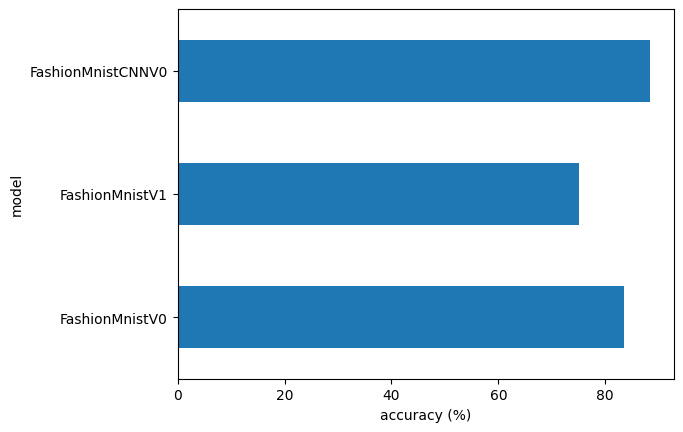

In [64]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

###**9. Make and evaluate random predictions with best model**
Alright, we've compared our models to each other, let's further evaluate our best performing model, modelv2.

To do so, let's create a function ```make_predictions()``` where we can pass the model and some data for it to predict on.

In [65]:
#test inference
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    model.to(device)
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            y_logit = model(sample)
            #print(y_logit.shape) #torch.Size([1, 10])
            y_pred_probs = torch.softmax(y_logit.squeeze(), dim=0) ## note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations like using with matplotlib
            pred_probs.append(y_pred_probs.to("cpu"))

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)


In [66]:
#get the random test samples and predict
import random
random.seed(42)
test_samples = []
test_true_labels = []
for sample, label in random.sample(list(test_data), k=9): #9 random test samples/examples
    test_samples.append(sample)
    test_true_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_true_labels[0]} ({class_names[test_true_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


And now we can use our ```make_predictions() ``` function to predict on test_samples.

In [67]:
# Make predictions on test samples with modelv2
test_pred_probs = make_predictions(modelv2, test_samples, device=device)

# View first two prediction probabilities list
test_pred_probs[:2]

tensor([[3.0969e-07, 5.8632e-09, 9.7214e-08, 5.4466e-08, 5.1580e-08, 9.9992e-01,
         3.4266e-07, 3.2192e-06, 1.2611e-05, 6.0749e-05],
        [1.0697e-01, 3.8883e-01, 1.4621e-02, 3.9465e-01, 5.7592e-02, 1.4956e-03,
         2.8953e-02, 1.1356e-03, 5.0788e-03, 6.7636e-04]])

Excellent!

And now we can go from prediction probabilities to prediction labels by taking the ```torch.argmax()``` of the output of the ```torch.softmax()``` activation function.

In [68]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = test_pred_probs.argmax(dim=1)
pred_classes

tensor([5, 3, 7, 4, 3, 0, 4, 7, 1])

In [69]:
# Are our predictions in the same form as our test labels?
test_true_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 3, 7, 4, 3, 0, 4, 7, 1]))

Now our predicted classes are in the same format as our test labels, we can compare.

Since we're dealing with image data, let's stay true to the data explorer's motto.

"Visualize, visualize, visualize!"

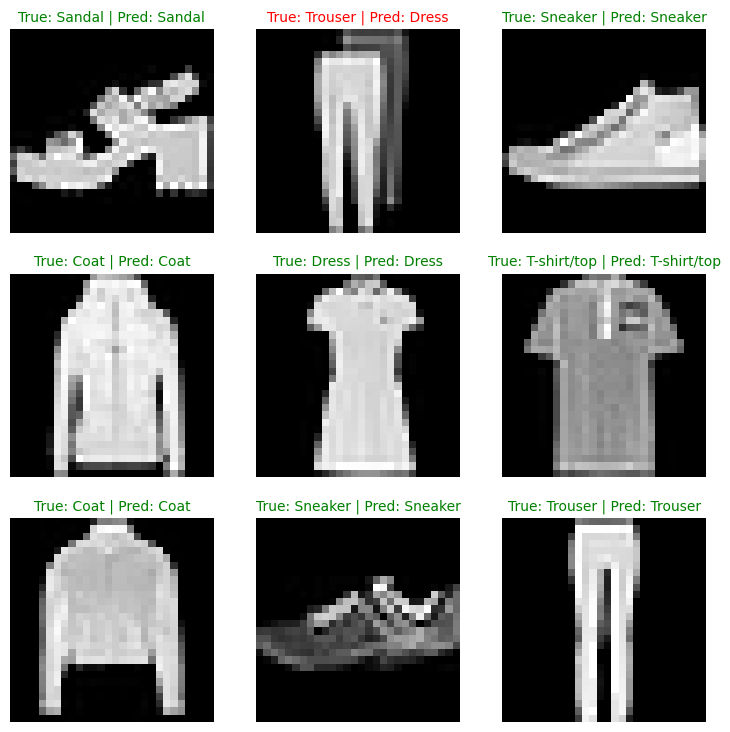

In [70]:
plt.figure(figsize=(9, 9))
n_rows, n_cols= 3, 3

for i in range(0, n_rows*n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(test_samples[i].squeeze(), cmap="gray")

    # Create the title text of the plot
    title_text = f"True: {class_names[test_true_labels[i]]} | Pred: {class_names[pred_classes[i]]}"

    # Check for equality and change title colour accordingly
    if pred_classes[i] == test_true_labels[i]:
        plt.title(title_text, fontsize=10, c="g") # green text if correct
    else:
        plt.title(title_text, fontsize=10, c="r") # red text if wrong
    plt.axis(False)
plt.show()

Well, well, well, doesn't that look good!

Not bad for a couple dozen lines of PyTorch code!

###**10. Making a confusion matrix for further prediction evaluation**
There are many different evaluation metrics we can use for classification problems. https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics

One of the most visual is a ```confusion matrix```.

A confusion matrix shows you where your classification model got confused between predicitons and true labels.

To make a confusion matrix, we'll go through three steps:

- Make predictions with our trained model, modelv2 (a confusion matrix compares predictions to true labels).
- Make a confusion matrix using ```torchmetrics.ConfusionMatrix```.
- Plot the confusion matrix using ```mlxtend.plotting.plot_confusion_matrix()```.

Let's start by making predictions with our trained model.

In [71]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
modelv2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device) #len(X) = 32
    # Do the forward pass
    y_logit = modelv2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())

print(len(y_preds)) #313 representing test batches
print(y_preds[0].shape) #torch.Size([32]) - 32 examples in each batch
print(y_preds[0]) #prediction labels
#print(y_preds)
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds) #concatenates everything into a single tensor

y_pred_tensor.shape #represents 1 prediction per test samples, total test samples = 10000 samples

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

313
torch.Size([32])
tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 8, 3, 4, 1, 2, 2, 8, 0, 2, 5, 7, 5,
        1, 6, 6, 0, 9, 3, 8, 8])


torch.Size([10000])

Wonderful!

Now we've got predictions, let's go through steps 2 & 3:

 2. Make a confusion matrix using torchmetrics.ConfusionMatrix.
 3. Plot the confusion matrix using mlxtend.plotting.plot_confusion_matrix().

First we'll need to make sure we've got torchmetrics and mlxtend installed (these two libraries will help us make and visual a confusion matrix).

Note: If you're using Google Colab, the default version of mlxtend installed is 0.22.0 (as of Dec 2023), for the parameters of the plot_confusion_matrix() function we'd like use, we need 0.19.0 or higher.

In [72]:
import mlxtend

In [73]:
mlxtend.__version__

'0.22.0'

In [74]:
from mlxtend.plotting import plot_confusion_matrix

In [75]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend Version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be higher or equal to 0.19.0"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.3 MB/s eta 0:00:00
mlxtend version: 0.22.0


```torchmetrics``` and ```mlxtend``` installed, let's make a ```confusion matrix```!

First we'll create a ```torchmetrics.ConfusionMatrix``` instance telling it how many classes we're dealing with by setting ```num_classes=len(class_names)```.

Then we'll create a confusion matrix (in tensor format) by passing our instance our model's predictions ```(preds=y_pred_tensor)``` and targets ```(target=test_data.targets)```.

Finally we can plot our confision matrix using the ```plot_confusion_matrix()``` function from mlxtend.plotting.

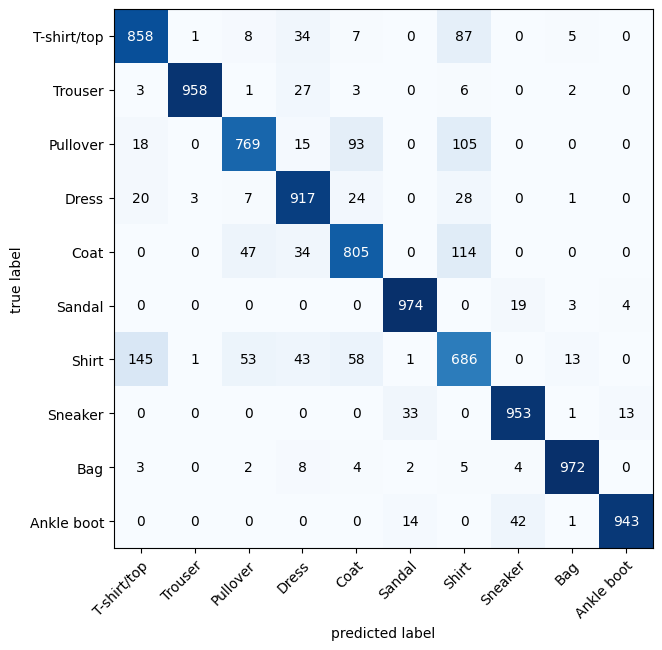

In [76]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
                      class_names=class_names, # turn the row and column labels into class names
                      figsize=(10, 7))

Woah! Doesn't that look good?

We can see our model does fairly well since most of the dark squares are down the diagonal from top left to bottom right (and ideal model will have only values in these squares and 0 everywhere else).

The model gets most "confused" on classes that are similar, for example predicting "Pullover" for images that are actually labelled "Shirt".

And the same for predicting "Shirt" for classes that are actually labelled "T-shirt/top".

This kind of information is often more helpful than a single accuracy metric because it tells use where a model is getting things wrong.

It also hints at why the model may be getting certain things wrong.

It's understandable the model sometimes predicts "Shirt" for images labelled "T-shirt/top".

We can use this kind of information to further inspect our models and data to see how it could be improved.

```Exercise: Use the trained modelV2 to make predictions on the entire test FashionMNIST dataset intead of randomly selecting few samples like before. Then plot some predictions where the model was wrong alongside what the label of the image should've been. After visualing these predictions do you think it's more of a modelling error or a data error? As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?```

In [77]:
test_data.targets, y_pred_tensor, torch.not_equal(y_pred_tensor, test_data.targets), torch.not_equal(y_pred_tensor, test_data.targets).nonzero(), torch.not_equal(y_pred_tensor, test_data.targets).sum()

(tensor([9, 2, 1,  ..., 8, 1, 5]),
 tensor([9, 2, 1,  ..., 8, 1, 5]),
 tensor([False, False, False,  ..., False, False, False]),
 tensor([[  12],
         [  17],
         [  23],
         ...,
         [9969],
         [9977],
         [9979]]),
 tensor(1165))

In [78]:
y_mispreds = torch.not_equal(y_pred_tensor, test_data.targets).nonzero()
randidx = random.sample(list(y_mispreds), k=1)
print(randidx)

[tensor([7233])]


In [79]:
sample, label = test_data[9991]
sample.shape

torch.Size([1, 28, 28])

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

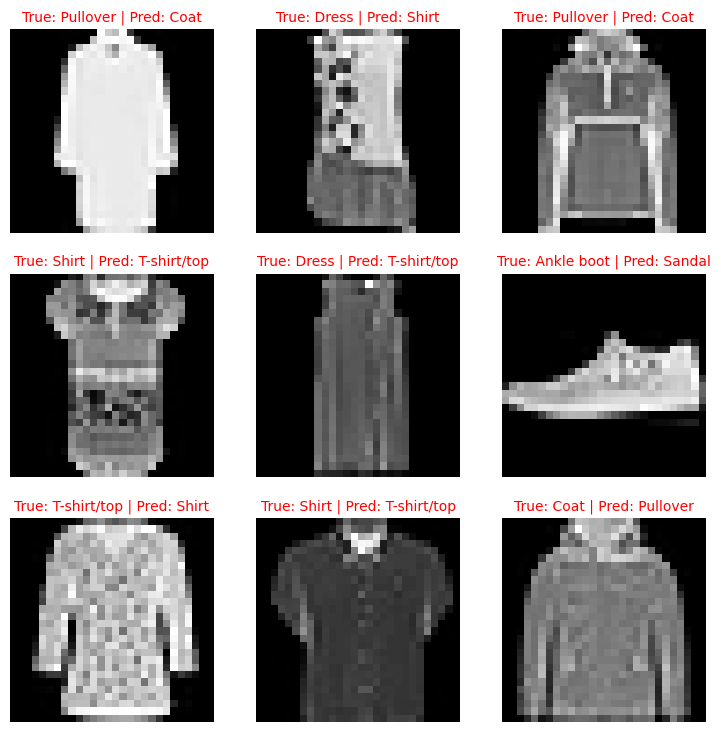

In [80]:
from tqdm.auto import tqdm
import random
random.seed(42)
y_preds = []
modelv2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X, y = X.to(device), y.to(device)
    y_logit = modelv2(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)

y_mispreds = torch.not_equal(y_pred_tensor, test_data.targets).nonzero()

plt.figure(figsize=(9, 9))
n_rows, n_cols= 3, 3
for i in range(0, n_rows*n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    randidx = random.sample(list(y_mispreds), k=1)[0].item()
    sample, label = test_data[randidx]
    plt.imshow(sample.squeeze(), cmap="gray")

    # Create the title text of the plot
    title_text = f"True: {class_names[test_data.targets[randidx]]} | Pred: {class_names[y_pred_tensor[randidx]]}"
    plt.title(title_text, fontsize=10, c="r") # red text
    plt.axis(False)
plt.show()

###**11. Save and load best performing model**
Let's finish this section off by saving and loading in our best performing model.

Recall from notebook 01 we can save and load a PyTorch model using a combination of:

- ```torch.save``` - a function to save a whole PyTorch model or a model's state_dict().
- ```torch.load``` - a function to load in a saved PyTorch object.
- ```torch.nn.Module.load_state_dict()``` - a function to load a saved state_dict() into an existing model instance.

You can see more of these three in the PyTorch saving and loading models documentation.

For now, let's save our model_2's state_dict() then load it back in and evaluate it to make sure the save and load went correctly

In [81]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=modelv2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


Now we've got a saved model state_dict() we can load it back in using a combination of ```load_state_dict()``` and ```torch.load()```.

Since we're using ```load_state_dict()```, we'll need to create a new instance of FashionMNISTModelV2() with the same input parameters as our saved model state_dict().

In [82]:
loadmodelV2 = FashionMnistCNNV0(input_shape=1,
                              output_shape=len(class_names),
                              hidden_units=10)
loadmodelV2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loadmodelV2 = loadmodelV2.to(device)

And now we've got a loaded model we can evaluate it with eval_model() to make sure its parameters work similarly to modelV2 prior to saving.

In [83]:
#Evaluate the loaded model
torch.manual_seed(42)

loadmodelV2_results = eval_model(
    model=loadmodelV2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device)

loadmodelV2_results

{'model_name': 'FashionMnistCNNV0',
 'model_loss': 0.3301297724246979,
 'model_acc': 88.36861022364218}


Do these results look the same as ```modelv2_results```?

In [84]:
modelv2_results

{'model_name': 'FashionMnistCNNV0',
 'model_loss': 0.3301297724246979,
 'model_acc': 88.36861022364218}

We can find out if two tensors are close to each other using torch.isclose() and passing in a tolerance level of closeness via the parameters atol (absolute tolerance) and rtol (relative tolerance).

If our model's results are close, the output of torch.isclose() should be true.

In [85]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(input=torch.tensor(modelv2_results["model_loss"]),
              other=torch.tensor(loadmodelV2_results["model_loss"]),
              atol=1e-8, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)

###**Exercises**
All of the exercises are focused on practicing the code in the sections above.

You should be able to complete them by referencing each section or by following the resource(s) linked.

All exercises should be completed using device-agnostic code.

**Resources**:

- Exercise template notebook for 03 https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb
- Example solutions notebook for 03 (try the exercises before looking at this) https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/03_pytorch_computer_vision_exercise_solutions.ipynb
1. What are 3 areas in industry where computer vision is currently being used?
2. Search "what is overfitting in machine learning" and write down a sentence about what you find.
3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. Note: there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.
4. Spend 20-minutes reading and clicking through the CNN Explainer website https://poloclub.github.io/cnn-explainer/.

    - Upload your own example image using the "upload" button and see what happens in each layer of a CNN as your image passes through it.
5. Load the ```torchvision.datasets.MNIST()``` train and test datasets.
6. Visualize at least 5 different samples of the MNIST training dataset.
7. Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.
8. Recreate ```modelV2``` used in this notebook (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.
9. Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.
10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.
11. Plot a confusion matrix comparing your model's predictions to the truth labels.
12. Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?
13. Use a model similar to the trained modelV2 from this notebook to make predictions on the test torchvision.datasets.FashionMNIST dataset.
    - Then plot some predictions where the model was wrong alongside what the label of the image should've been.
    - After visualing these predictions do you think it's more of a modelling error or a data error?
    - As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?


### **Extra-curriculum**
- Watch: MIT's Introduction to Deep Computer Vision lecture https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3. This will give you a great intuition behind convolutional neural networks.
- Spend 10-minutes clicking thorugh the different options of the PyTorch vision library, what different modules are available?
- Lookup "most common convolutional neural networks", what architectures do you find? Are any of them contained within the torchvision.models library? What do you think you could do with these?
- For a large number of pretrained PyTorch computer vision models as well as many different extensions to PyTorch's computer vision functionalities check out the PyTorch Image Models library timm (Torch Image Models) by Ross Wightman https://github.com/rwightman/pytorch-image-models/.

In [86]:
#5. Load the torchvision.datasets.MNIST() train and test datasets.
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import random

torch.manual_seed(42)
random.seed(42)
device = ("cuda" if torch.cuda.is_available() else "cpu")

train_data = MNIST(
    root="./data", train=True, transform=ToTensor(), download=True
    )
test_data = MNIST(
    root="./data", train=False, transform=ToTensor(), download=True
    )


100%|██████████| 9912422/9912422 [00:00<00:00, 164922117.01it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 41713393.19it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 51182950.07it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 20331407.44it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [87]:
type(train_data), type(test_data)

(torchvision.datasets.mnist.MNIST, torchvision.datasets.mnist.MNIST)

In [88]:
train_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [89]:
class_names = train_data.classes

In [90]:
train_data.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [91]:
train_data.targets, test_data.targets

(tensor([5, 0, 4,  ..., 5, 6, 8]), tensor([7, 2, 1,  ..., 4, 5, 6]))

In [92]:
len(train_data.data), len(test_data.data)

(60000, 10000)

In [93]:
train_data[0][0].shape, train_data[0][1] #each image is 1x28x28 grayscale image

(torch.Size([1, 28, 28]), 5)

In [94]:
test_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [95]:
random.sample(list(train_data.targets.numpy()), k=1)[0]

9

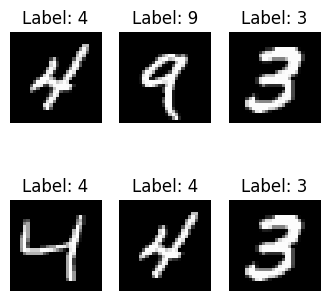

In [96]:
#6. Visualize at least 5 different samples of the MNIST training dataset.
import random
random.seed(42)

n_cols, n_rows = 3, 2
plt.figure(figsize=(4, 4))
for i in range(0, n_rows*n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    random_idx = random.sample(list(train_data.targets.numpy()), k=1)[0]
    img = train_data.data[random_idx]
    label = train_data.targets[random_idx].item()
    plt.imshow(img, cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")
plt.show()

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


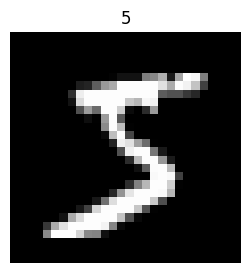

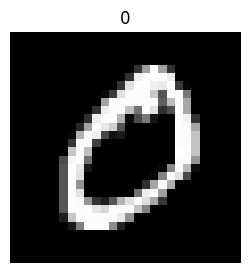

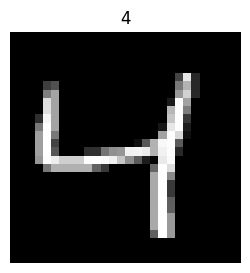

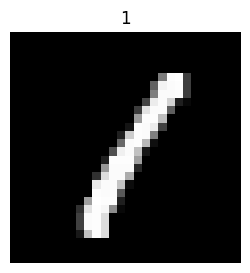

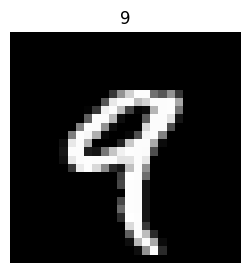

In [97]:
import matplotlib.pyplot as plt
for i in range(5):
    img = train_data[i][0]
    print(img.shape)
    img_squeeze = img.squeeze()
    print(img_squeeze.shape)
    label = train_data[i][1]
    plt.figure(figsize=(3, 3))
    plt.imshow(img_squeeze, cmap="gray")
    plt.title(label)
    plt.axis(False);


In [98]:
#7. Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.
train_dataloader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=32, shuffle=False)

In [99]:
for sample in next(iter(train_dataloader)):
  print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [100]:
len(train_dataloader), len(test_dataloader) #number of batches

(1875, 313)

In [101]:
#8. Recreate modelV2 used in notebook 03 (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.
class TinyVGGMNIST(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

torch.manual_seed(42)
modelMNIST = TinyVGGMNIST(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
modelMNIST

TinyVGGMNIST(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [102]:
#9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.
from tqdm.auto import tqdm

def train_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
               optimizer: torch.optim, loss_fn: torch.nn.Module,
               accuracy_fn, device: torch.device
               ):
    model.to(device)
    train_loss, train_acc = 0., 0.
    for batch, (X, Y) in enumerate(data_loader):
        model.train()
        X, Y = X.to(device), Y.to(device)
        Y_logits = model(X)
        Y_preds = torch.softmax(Y_logits, dim=1).argmax(dim=1)
        loss = loss_fn(Y_logits, Y)
        train_loss += loss
        train_acc += accuracy_fn(Y, Y_preds)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss: {train_loss:.5f}, Train Accuracy: {train_acc:.5f}%")


def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, accuracy_fn, device: torch.device):
    model.to(device)
    model.eval()
    eval_loss, eval_acc = 0.0, 0.0
    with torch.inference_mode():
        for X, Y in data_loader:
            X, Y = X.to(device), Y.to(device)
            Y_logits = model(X)
            Y_preds = torch.softmax(Y_logits, dim=1).argmax(dim=1)
            loss = loss_fn(Y_logits, Y)
            accuracy = accuracy_fn(Y, Y_preds)
            eval_loss += loss
            eval_acc += accuracy
        eval_loss /= len(data_loader)
        eval_acc /= len(data_loader)
    return {
        "model": model.__class__.__name__,
        "loss": eval_loss.item(),
        "accuracy": eval_acc
    }

def test_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module, accuracy_fn, device: torch.device):
    model.to(device)
    model.eval()
    test_loss, test_acc = 0.0, 0.0
    with torch.inference_mode():
        for X, Y in data_loader:
            X, Y = X.to(device), Y.to(device)
            Y_logits = model(X)
            Y_preds = torch.softmax(Y_logits, dim=1).argmax(dim=1)
            loss = loss_fn(Y_logits, Y)
            accuracy = accuracy_fn(Y, Y_preds)
            test_loss += loss
            test_acc += accuracy
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
    print(f"Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.5f}\n")

#accuracy function
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
    from helper_functions import accuracy_fn
else:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
    from helper_functions import accuracy_fn

#timer functions
from timeit import default_timer

def print_train_time(start_time: float, end_time: float, device: torch.device = None):
    total_time = end_time - start_time
    print(f"Time taken on {device}: {total_time:.3f} seconds")
    return total_time

helper_functions.py already exists, skipping download


In [103]:
#training on gpu
device = ("cuda" if torch.cuda.is_available() else "cpu")

#optimizer
myoptimizer = torch.optim.SGD(params=modelMNIST.parameters(), lr=0.1)
#loss function
loss_fn = torch.nn.CrossEntropyLoss()

#training and evaluation loop
torch.manual_seed(42)
epochs = 5
train_time_start_on_gpu = default_timer()
for i in tqdm(range(epochs)):
    print(f"Epoch: {i}\n---------")
    train_step(modelMNIST, train_dataloader, myoptimizer, loss_fn, accuracy_fn, device)
    test_step(modelMNIST, test_dataloader, loss_fn, accuracy_fn, device)



train_time_end_on_gpu = default_timer()
total_time_on_gpu = print_train_time(train_time_start_on_gpu,
                                     train_time_end_on_gpu,
                                     device)

modelMNIST_results = eval_model(modelMNIST,
                                test_dataloader,
                                loss_fn, accuracy_fn,
                                device)
modelMNIST_results

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 0.31511, Train Accuracy: 89.44000%
Test Loss: 0.07176, Test Accuracy: 97.81350

Epoch: 1
---------
Train Loss: 0.08064, Train Accuracy: 97.47500%
Test Loss: 0.05797, Test Accuracy: 98.13299

Epoch: 2
---------
Train Loss: 0.06213, Train Accuracy: 98.10333%
Test Loss: 0.05007, Test Accuracy: 98.33267

Epoch: 3
---------
Train Loss: 0.05402, Train Accuracy: 98.34000%
Test Loss: 0.04800, Test Accuracy: 98.36262

Epoch: 4
---------
Train Loss: 0.04792, Train Accuracy: 98.45500%
Test Loss: 0.04314, Test Accuracy: 98.57228

Time taken on cuda: 69.462 seconds


{'model': 'TinyVGGMNIST',
 'loss': 0.043144773691892624,
 'accuracy': 98.57228434504792}

In [104]:
%%time
#train on cpu
device = "cpu"
#optimizer
myoptimizer = torch.optim.SGD(params=modelMNIST.parameters(), lr=0.1)
#loss function
loss_fn = torch.nn.CrossEntropyLoss()

#training and evaluation loop
print(f"Training on : {device}")
torch.manual_seed(42)
epochs = 5
train_time_start_on_gpu = default_timer()
for i in tqdm(range(epochs)):
    print(f"Epoch: {i}\n---------")
    train_step(modelMNIST, train_dataloader, myoptimizer, loss_fn, accuracy_fn, device)
    test_step(modelMNIST, test_dataloader, loss_fn, accuracy_fn, device)

modelMNIST_cpu_results = eval_model(modelMNIST,
                                test_dataloader,
                                loss_fn, accuracy_fn,
                                device)
modelMNIST_cpu_results

Training on : cpu


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 0.04323, Train Accuracy: 98.62500%
Test Loss: 0.04152, Test Accuracy: 98.66214

Epoch: 1
---------
Train Loss: 0.03969, Train Accuracy: 98.71167%
Test Loss: 0.04343, Test Accuracy: 98.68211

Epoch: 2
---------
Train Loss: 0.03577, Train Accuracy: 98.84167%
Test Loss: 0.04490, Test Accuracy: 98.54233

Epoch: 3
---------
Train Loss: 0.03432, Train Accuracy: 98.89500%
Test Loss: 0.03699, Test Accuracy: 98.68211

Epoch: 4
---------
Train Loss: 0.03129, Train Accuracy: 98.99333%
Test Loss: 0.03756, Test Accuracy: 98.77196

CPU times: user 2min 54s, sys: 1.4 s, total: 2min 55s
Wall time: 2min 57s


{'model': 'TinyVGGMNIST',
 'loss': 0.0375584214925766,
 'accuracy': 98.77196485623003}

In [105]:
#10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            # print(sample.shape) #([1, 1, 28, 28])
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [106]:
import random
random.seed(42)

test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=6):
    test_samples.append(sample)
    test_labels.append(label)
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

# Make predictions on test samples with model
pred_probs= make_predictions(model=modelMNIST, data=test_samples)

# Turn the prediction probabilities into prediction labels by argmax()
pred_classes = pred_probs.argmax(dim=1)
test_labels, pred_classes

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 2 (2 - two)


([2, 1, 2, 4, 6, 6], tensor([2, 1, 2, 4, 6, 6]))

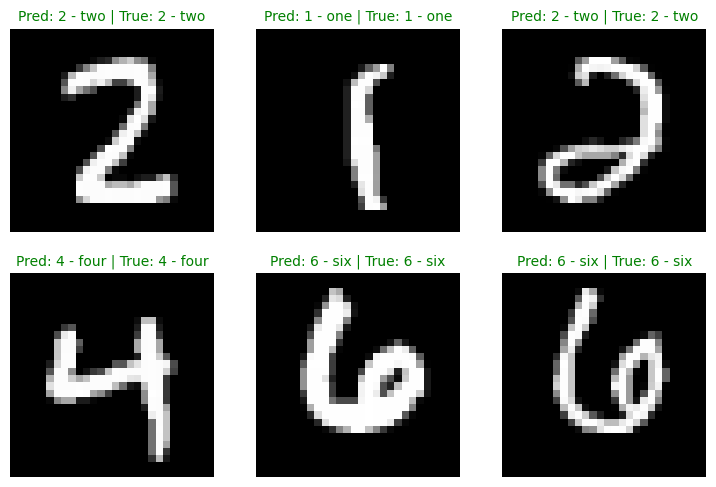

In [107]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = class_names[pred_classes[i]]
  true_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | True: {true_label}"

  if pred_label == true_label:
      plt.title(title_text, fontsize=10, c="g")
  else:
      plt.title(title_text, fontsize=10, c="r")
  plt.axis(False);
plt.show()

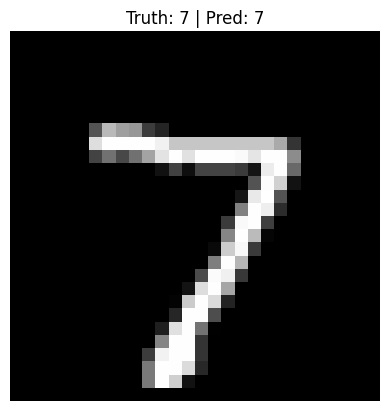

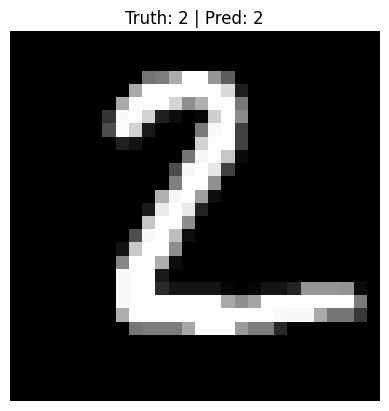

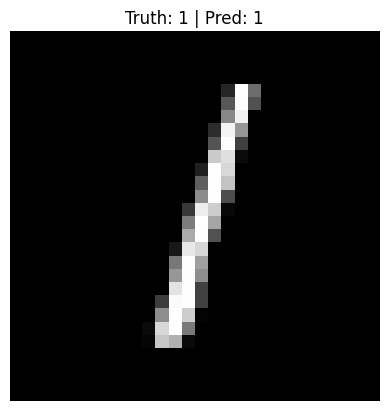

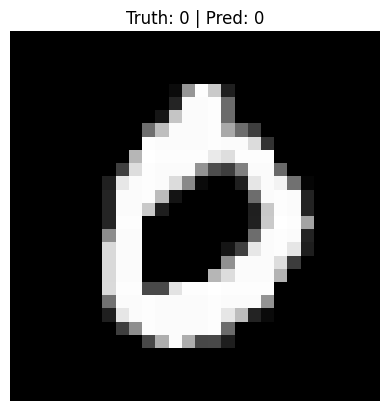

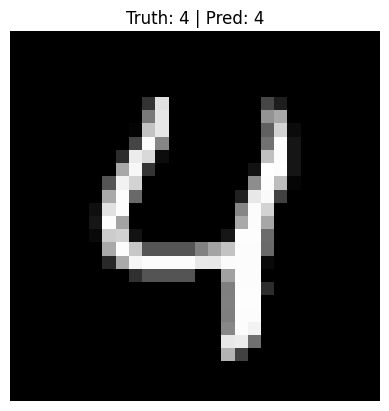

In [108]:
num_to_plot = 5
for i in range(num_to_plot):
    # Get image and labels from the test data
    img = test_data[i][0]
    label = test_data[i][1]

    # Make prediction on image
    model_pred_logits = modelMNIST(img.unsqueeze(dim=0).to(device))
    model_pred_probs = torch.softmax(model_pred_logits, dim=1)
    model_pred_label = torch.argmax(model_pred_probs, dim=1)

    # Plot the image and prediction
    plt.figure()
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
    plt.axis(False);

In [109]:
from tqdm.auto import tqdm
y_preds = []
modelMNIST.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions"):
        X, y = X.to(device), y.to(device)
        y_logit = modelMNIST(X)
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        y_preds.append(y_pred)
    y_pred_tensor = torch.cat(y_preds).cpu()
len(y_pred_tensor)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

10000

In [110]:
test_data.targets[:10], y_pred_tensor[:10]

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

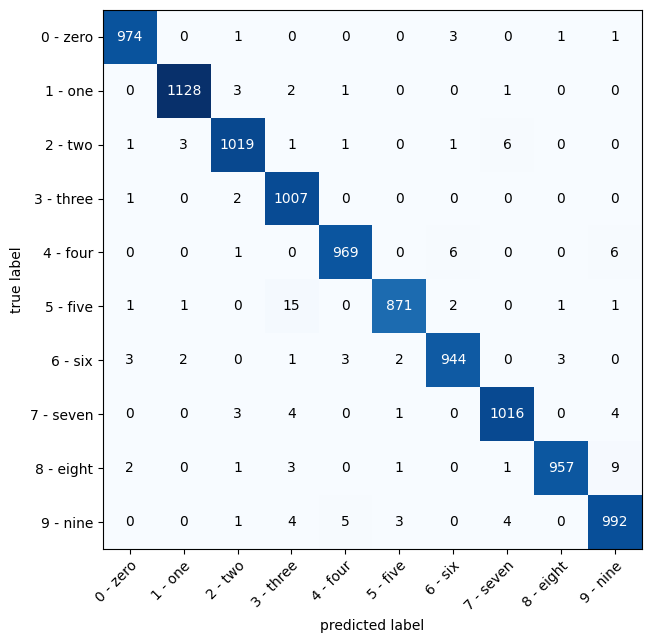

In [111]:
#11. Plot a confusion matrix comparing your model's predictions to the truth labels.
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names),
                          task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

fig, ax = plot_confusion_matrix(confmat_tensor.numpy(),
                                figsize=(10, 7),
                                class_names=class_names)

In [112]:
#12. Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer
# with various hyperparameter settings (these can be any settings you choose),
#what do you notice if the kernel_size parameter goes up and down?
torch.manual_seed(42)
randtensor = torch.rand([1, 3, 64, 64])
#hyperparameters
IN_CHANNELS = 3
OUT_CHANNELS = 10
KERNEL_SIZE = 3
STRIDE = 2
PADDING=1
myconvlayer = torch.nn.Conv2d(in_channels=IN_CHANNELS,
                              out_channels=OUT_CHANNELS,
                              kernel_size=KERNEL_SIZE,
                              stride=STRIDE,
                              padding=PADDING)
out = myconvlayer(randtensor)
out.shape

torch.Size([1, 10, 32, 32])

In [113]:
IN_CHANNELS = 3
OUT_CHANNELS = 10
KERNEL_SIZE = 5
STRIDE = 2
PADDING=1
myconvlayer = torch.nn.Conv2d(in_channels=IN_CHANNELS,
                              out_channels=OUT_CHANNELS,
                              kernel_size=KERNEL_SIZE,
                              stride=STRIDE,
                              padding=PADDING)
out = myconvlayer(randtensor)
out.shape

torch.Size([1, 10, 31, 31])

In [114]:
IN_CHANNELS = 3
OUT_CHANNELS = 10
KERNEL_SIZE = 7
STRIDE = 2
PADDING=1
myconvlayer = torch.nn.Conv2d(in_channels=IN_CHANNELS,
                              out_channels=OUT_CHANNELS,
                              kernel_size=KERNEL_SIZE,
                              stride=STRIDE,
                              padding=PADDING)
out = myconvlayer(randtensor)
out.shape

torch.Size([1, 10, 30, 30])

In [115]:
IN_CHANNELS = 3
OUT_CHANNELS = 10
KERNEL_SIZE = 2
STRIDE = 2
PADDING=1
myconvlayer = torch.nn.Conv2d(in_channels=IN_CHANNELS,
                              out_channels=OUT_CHANNELS,
                              kernel_size=KERNEL_SIZE,
                              stride=STRIDE,
                              padding=PADDING)
out = myconvlayer(randtensor)
out.shape

torch.Size([1, 10, 33, 33])

In [116]:
IN_CHANNELS = 3
OUT_CHANNELS = 10
KERNEL_SIZE = 1
STRIDE = 2
PADDING=1
myconvlayer = torch.nn.Conv2d(in_channels=IN_CHANNELS,
                              out_channels=OUT_CHANNELS,
                              kernel_size=KERNEL_SIZE,
                              stride=STRIDE,
                              padding=PADDING)
out = myconvlayer(randtensor)
out.shape

torch.Size([1, 10, 33, 33])

###**Extra-curriculum**
- Watch: MIT's Introduction to Deep Computer Vision lecture https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3. This will give you a great intuition behind convolutional neural networks.
- Spend 10-minutes clicking thorugh the different options of the PyTorch vision library https://pytorch.org/vision/stable/index.html, https://pytorch.org/vision/stable/auto_examples/index.html#gallery what different modules are available?
- Lookup "most common convolutional neural networks", what architectures do you find? Are any of them contained within the torchvision.models library? What do you think you could do with these?
- For a large number of pretrained PyTorch computer vision models as well as many different extensions to PyTorch's computer vision functionalities check out the PyTorch Image Models library timm (Torch Image Models) by Ross Wightman. https://github.com/rwightman/pytorch-image-models/